In [1]:
# import library
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from bs4 import BeautifulSoup

# Scrapping data from VNDB

In [2]:
scrapped_data = []
page = 0
for page in range(1,6):
    # retrieve URL per page
    url = 'https://vndb.org/v?f=&o=d&p={}&s=pop'.format(str(page))
    response = requests.request('GET', url)
    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find('table', attrs={'class':'stripe'})
    
    for item in table.find_all('tr')[1:]:
        # get data from VNDB
        title = item.find('td', attrs={'class':'tc1'}).a.text
        platform = item.find('td', {'class':'tc2'}).find_all('abbr')
        platform  = ','.join([i['title'] for i in platform])
        lang = item.find('td', attrs={'class':'tc3'}).find_all('abbr')
        lang = ','.join([i['title'] for i in lang])
        released = item.find('td', {'class':'tc4'}).text
        popularity = item.find('td', {'class':'tc5'}).text
        rating = item.find('td', {'class':'tc6'}).text
        total_rating_user = item.find('td', {'class':'tc6'}).b.text[2:-1]
    
        # assign data to dict_data
        dict_data = {}
        dict_data['title'] = title
        dict_data['platform'] = platform
        dict_data['language'] = lang
        dict_data['released'] = released
        dict_data['popularity'] = float(popularity)
        dict_data['rating'] = float(rating.split(' ', 1)[0])
        dict_data['total_rating_user'] = int(rating.split(' ', 1)[1][1:-1])
        
        scrapped_data.append(dict_data)

# assign data as DataFrame
dframe = pd.DataFrame.from_dict(scrapped_data)
dframe.to_csv('dataVN.csv', index=False) # export data to 'dataVN.csv'

In [3]:
dframe['released'] = pd.to_datetime(dframe['released'], format='%Y-%m-%d')

In [4]:
print(dframe.shape)
dframe.head()

(250, 7)


,title,platform,language,released,popularity,rating,total_rating_user
0,Fate/Stay Night,"Android,Apple iProduct,Nintendo DS,PlayStation...","Chinese,Vietnamese,Russian,Korean,Japanese,Ita...",2004-01-30,100.00,8.62,11968
1,Saya no Uta,"Android,Blu-ray Player,Linux,Mac OS,Nintendo D...","Chinese,Vietnamese,Turkish,Russian,Portuguese ...",2003-12-26,87.91,8.09,11657
2,G-senjou no Maou,"PlayStation Portable,VNDS,Windows","Chinese,Vietnamese,Portuguese (Brazil),Polish,...",2008-05-29,84.39,8.37,9427
3,Steins;Gate,"Android,Apple iProduct,PlayStation 3,PlayStati...","Chinese,Vietnamese,Russian,Portuguese (Brazil)...",2009-10-15,81.69,9.01,8751
4,Grisaia no Kajitsu -Le Fruit de la Grisaia-,"Android,Linux,PlayStation Portable,PlayStation...","Russian,Korean,Japanese,Spanish,English",2011-02-25,80.16,8.41,8966


# Exploratory Data Analysis

## Data analysis

In [5]:
# visual novel populer yang memilki translate bahasa indonesia
data = []
for n, v in enumerate(dframe['language']):
    if any([x == 'Indonesian' for x in v.split(',')]):
        data.append(n)
        
dframe.loc[data]

,title,platform,language,released,popularity,rating,total_rating_user
171,9 -Nine- Kokonotsu Kokonoka Kokonoiro,Windows,"Chinese,Korean,Japanese,Indonesian,Spanish,Eng...",2017-04-28,9.82,7.30,1091
185,Juniper's Knot,"Android,Apple iProduct,Linux,Mac OS,Windows","Chinese,Turkish,Russian,Portuguese (Portugal),...",2012-04-12,8.93,7.10,1072
198,Lucy - Geunyeoga Baladeon Geos -,"Android,Apple iProduct,Windows","Chinese,Russian,Portuguese (Brazil),Korean,Jap...",2010-01-01,8.33,7.49,978


In [6]:
# visual novel yang memilki total rating user lebih dari 5000 dan rilis 2015 ke atas
dframe.loc[(dframe['total_rating_user'] > 5000) &
          (dframe['released'].dt.year > 2015)]

,title,platform,language,released,popularity,rating,total_rating_user
25,Doki Doki Literature Club!,"Android,Linux,Mac OS,Nintendo 3DS,PlayStation ...","Chinese,Vietnamese,Ukrainian,Turkish,Russian,P...",2017-09-22,40.76,7.08,7050


In [7]:
# visual novel yang memiliki rating >= 8 dan total_rating_user < 1000
dframe.loc[(dframe.rating >= 8)&
          (dframe.total_rating_user < 1000)]

,title,platform,language,released,popularity,rating,total_rating_user
142,White Album 2 ~Closing Chapter~,"PlayStation 3,PlayStation Vita,Windows","Chinese,Korean,Japanese,English",2011-12-22,11.73,8.78,977
147,Utawarerumono: Futari no Hakuoro,"Android,Apple iProduct,PlayStation 3,PlayStati...","Chinese,Korean,Japanese,English",2016-09-21,11.44,8.77,968
174,Gyakuten Kenji 2,"Android,Apple iProduct,Nintendo DS","Chinese,Japanese,Spanish,English",2011-02-03,9.55,8.31,939
194,Hatsuyuki Sakura,"Android,Apple iProduct,PlayStation 4,PlayStati...","Chinese,Korean,Japanese,Spanish",2012-02-24,8.46,8.10,654
195,Soukou Akki Muramasa,Windows,"Chinese,Korean,Japanese",2009-10-30,8.35,8.69,614
200,Rose Guns Days,"Android,Apple iProduct,Mac OS,Windows","Chinese,Russian,Japanese,Spanish,English",2012-08-11,8.19,8.07,741
202,Mahoutsukai no Yoru,Windows,"Chinese,Vietnamese,Russian,Korean,Japanese,Ita...",2012-04-12,8.05,8.31,740
215,Sakura no Uta -Sakura no Mori no Ue o Mau-,Windows,"Chinese,Korean,Japanese,Spanish",2015-10-23,7.58,8.65,567
225,Fata morgana no Yakata -Another Episodes-,"PlayStation 4,PlayStation Vita,Windows","Chinese,Russian,Japanese,English",2015-08-16,7.17,8.17,657
237,428 ~Fuusa Sareta Shibuya de~,"Android,Apple iProduct,PlayStation 3,PlayStati...","Chinese,Korean,Japanese,English",2008-12-04,6.79,8.21,627


In [8]:
# visual novel rilis pada summer (juni-agustus untuk wilayah jepang)
summer_vn = dframe.loc[(dframe.released.dt.month >= 6) &
          (dframe.released.dt.month <= 8)]
summer_vn

,title,platform,language,released,popularity,rating,total_rating_user
8,Maji de Watashi ni Koishinasai!!,"PlayStation 3,Windows","Chinese,Russian,Japanese,Spanish,English",2009-08-28,59.56,8.35,6211
9,Umineko no Naku Koro ni,"Android,Apple iProduct,Linux,Mac OS,PlayStatio...","Chinese,Russian,Portuguese (Brazil),Japanese,I...",2007-08-17,58.39,8.82,6411
10,Ever17 -The Out of Infinity-,"Android,Dreamcast,Apple iProduct,PlayStation 2...","Chinese,Russian,Japanese,Spanish,English",2002-08-29,57.93,8.50,6197
11,Little Busters!,"Android,PlayStation 2,PlayStation 3,PlayStatio...","Chinese,Russian,Portuguese (Brazil),Korean,Jap...",2007-07-27,57.90,8.56,6151
14,Tsukihime,"Game Boy Advance,Apple iProduct,Linux,PlayStat...","Chinese,Vietnamese,Russian,Portuguese (Brazil)...",2000-08-11,54.55,8.20,6242
...,...,...,...,...,...,...,...
236,Angel Beats! -1st beat-,Windows,"Chinese,Russian,Korean,Japanese,English",2015-06-26,6.80,7.84,684
240,Sono Hanabira ni Kuchizuke o: Anata o Suki na ...,"VNDS,Windows","Chinese,Portuguese (Brazil),Japanese,Spanish,E...",2008-07-25,6.67,7.16,685
241,Osananajimi wa Daitouryou ~My Girlfriend is th...,Windows,"Japanese,English",2010-08-13,6.62,6.75,749
244,One ~Kagayaku Kisetsu e~,"Android,PlayStation 1,Website,Windows","Chinese,Korean,Japanese,Spanish,English",1998-06-26,6.57,6.90,722


In [9]:
# visual novel populer yang memilki translate inggris dan platform android
data = []
for n, v in enumerate(zip(dframe['language'], dframe['platform'])):
    if any([x == 'English' for x in v[0].split(',')]):
        if any([x == 'Android' for x in v[1].split(',')]):
            data.append(n)
        
dframe.loc[data]

,title,platform,language,released,popularity,rating,total_rating_user
0,Fate/Stay Night,"Android,Apple iProduct,Nintendo DS,PlayStation...","Chinese,Vietnamese,Russian,Korean,Japanese,Ita...",2004-01-30,100.00,8.62,11968
1,Saya no Uta,"Android,Blu-ray Player,Linux,Mac OS,Nintendo D...","Chinese,Vietnamese,Turkish,Russian,Portuguese ...",2003-12-26,87.91,8.09,11657
3,Steins;Gate,"Android,Apple iProduct,PlayStation 3,PlayStati...","Chinese,Vietnamese,Russian,Portuguese (Brazil)...",2009-10-15,81.69,9.01,8751
4,Grisaia no Kajitsu -Le Fruit de la Grisaia-,"Android,Linux,PlayStation Portable,PlayStation...","Russian,Korean,Japanese,Spanish,English",2011-02-25,80.16,8.41,8966
5,Katawa Shoujo,"Android,Linux,Mac OS,Website,Windows","Chinese,Turkish,Russian,Portuguese (Brazil),Po...",2009-04-29,77.60,7.84,12432
...,...,...,...,...,...,...,...
233,Higanbana no Saku Yoru ni - Dai Ni Ya,"Android,Mac OS,Windows","Chinese,Russian,Japanese,English",2011-12-31,6.92,7.35,714
237,428 ~Fuusa Sareta Shibuya de~,"Android,Apple iProduct,PlayStation 3,PlayStati...","Chinese,Korean,Japanese,English",2008-12-04,6.79,8.21,627
239,Magical Marriage Lunatics!!,"Android,DVD Player,Apple iProduct,Windows","Japanese,English",2013-09-27,6.72,6.94,753
243,RE: Alistair,"Android,Linux,Mac OS,Windows","Chinese,Russian,Portuguese (Brazil),Spanish,En...",2010-02-28,6.58,6.71,895


## Data Visualization

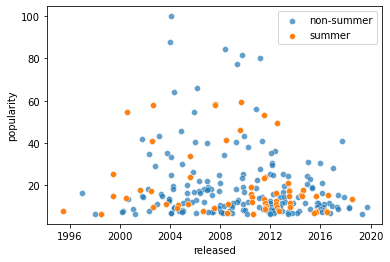

In [10]:
# Berdasarkan data analysis sebelumnya tentang visual novel summer
# apakah popularitas visual novel meningkat jika rilis di waktu summer?
# asumsi dikarenakan waktu summer biasanya terdapat diskon dan event menarik di Jepang
sns.scatterplot(data=dframe, x='released', y='popularity', alpha=.7, label='non-summer')
sns.scatterplot(data=summer_vn, x='released', y='popularity', label='summer')
plt.legend()
plt.show()

<AxesSubplot:ylabel='title'>

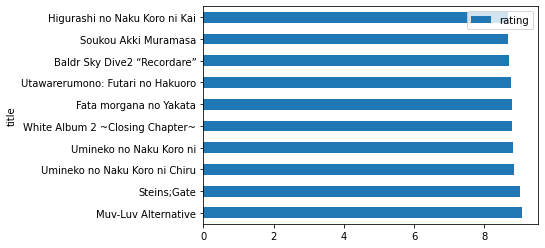

In [11]:
# Top Visual Novel by Rating
dframe.sort_values('rating', ascending=False)[:10].plot(kind='barh', x='title', y='rating')

<AxesSubplot:xlabel='rating', ylabel='total_rating_user'>

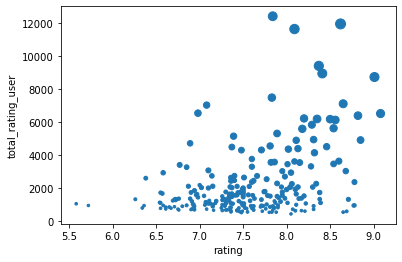

In [12]:
# grafik korelasi rating dan popularitas adalah positive correlation
# begitu juga dengan popularitas yang semakin meningkat seiring dengan rating dan total_rating_user
dframe.plot(kind='scatter', s='popularity', x='rating', y='total_rating_user')

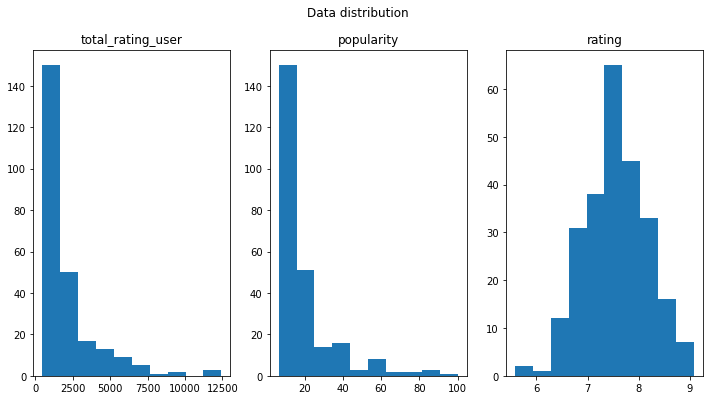

In [13]:
# grafik sebaran total user yang melakukan rating pada setiap visual novel
# 140 lebih visual novel di rating oleh kurang dari 2000 user
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,6))
fig.suptitle('Data distribution')

ax1.hist(dframe['total_rating_user'])
ax1.set_title('total_rating_user')
ax2.hist(dframe['popularity'])
ax2.set_title('popularity')
ax3.hist(dframe['rating'])
ax3.set_title('rating')
plt.show()

<AxesSubplot:xlabel='released'>

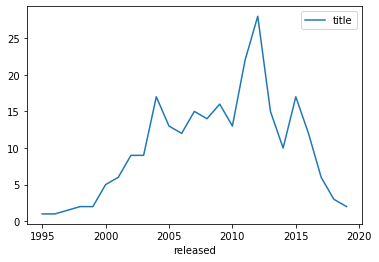

In [14]:
# grafik jumlah perilisan visual novel setiap tahun
# mengalami puncak jumlah perilisan pada tahun 2012 sebanyak 28 visual novel
dframe[['title']].groupby(dframe.released.dt.year).count().plot()

<AxesSubplot:xlabel='released', ylabel='rating'>

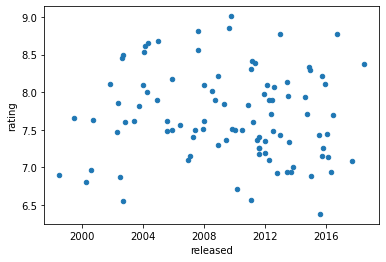

In [15]:
# visual novel dengan platform android 
data = []
for n, v in enumerate(dframe['platform']):
    if any([x == 'Android' for x in v.split(',')]):
        data.append(n)
        
dframe.loc[data].plot(kind='scatter', x='released', y='rating')